In [7]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from numpy import pi, random
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_counts
from qiskit.quantum_info import Pauli
from qiskit_aer.primitives import Estimator
import numpy as np


# Initialize a quantum circuit with 127 qubits
num_qubits = 127 # it represents circuit depths here. last circuit involves 127 CNOT gate applied on a single qubit
qc = QuantumCircuit(num_qubits)

# Apply X gates
for i in range(num_qubits):
    for _ in range(i):
        qc.x(i)

# Draw the circuit, use this for less no of circuit depths,say 5 instead of 127. Then it is easy to visualize
#qc.draw('mpl')


In [8]:
#Initialize a list to store the Pauli operators
pauli_operators = []

# Loop through the number of qubits and create Pauli operators
for i in range(num_qubits):
    pauli_string = ['I'] * num_qubits  # Start with all identity operators
    pauli_string[num_qubits-1-i] = 'Z'      # Set the i-th qubit to be a Z operator
    pauli_operators.append(Pauli(''.join(pauli_string)))

estimator=Estimator()
job=estimator.run([qc]*len(pauli_operators), pauli_operators)
#job.result()

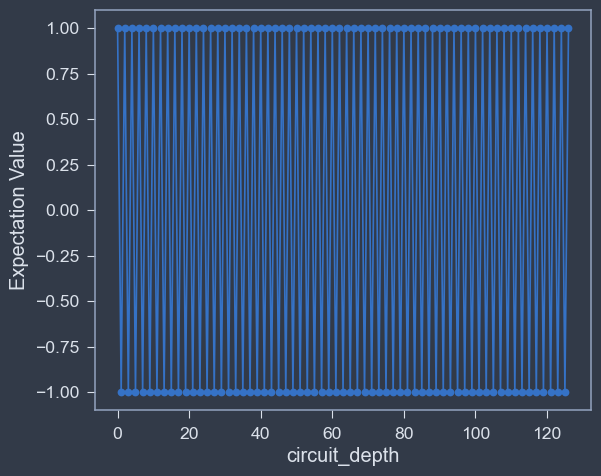

In [9]:
import matplotlib.pyplot as plt
values=job.result().values
plt.plot(range(num_qubits), values, '-o')
plt.xlabel('circuit_depth')
plt.ylabel('Expectation Value')
plt.savefig('30q-classical-computer-bit-flip-run-03.png')
plt.show()